In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

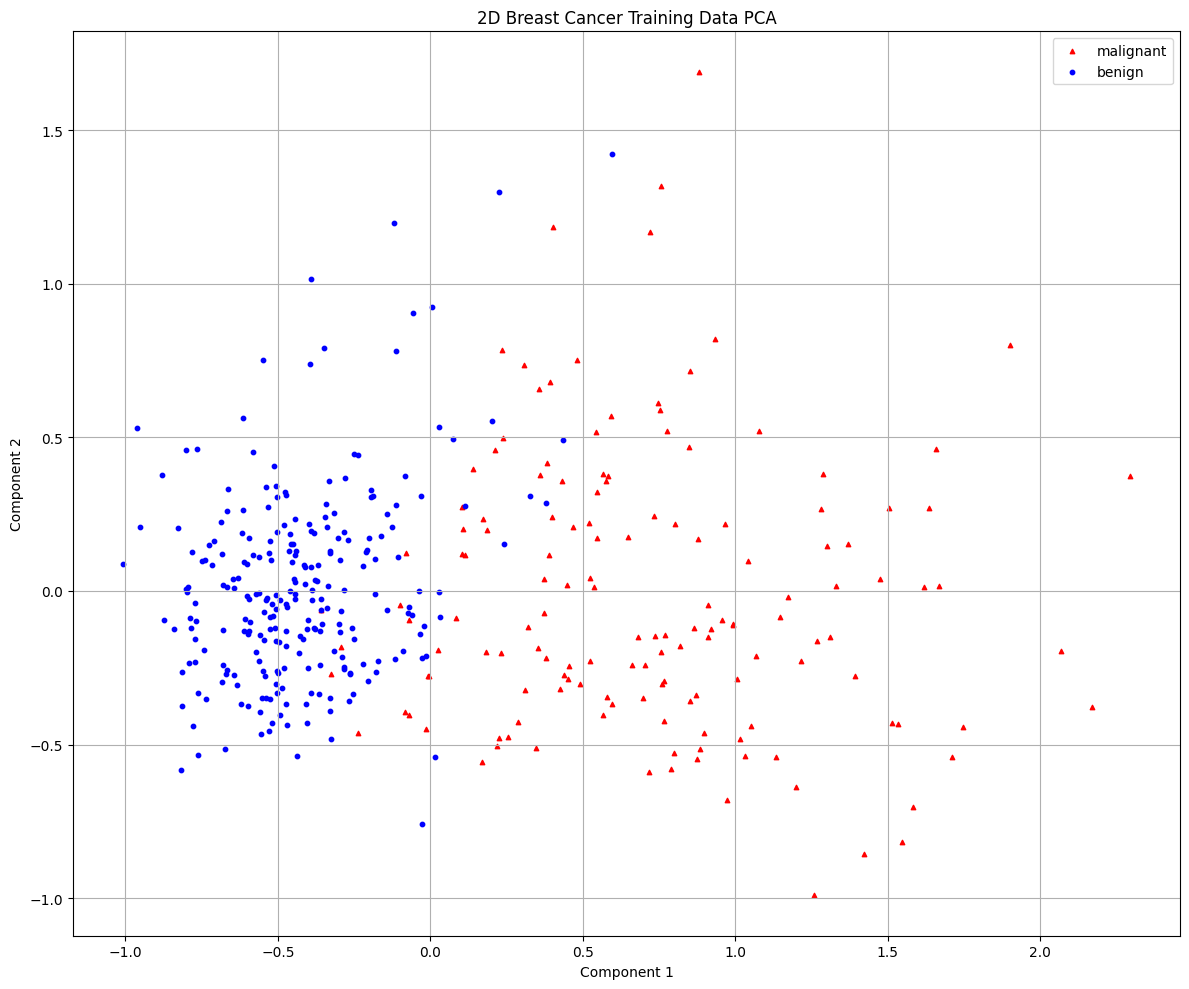

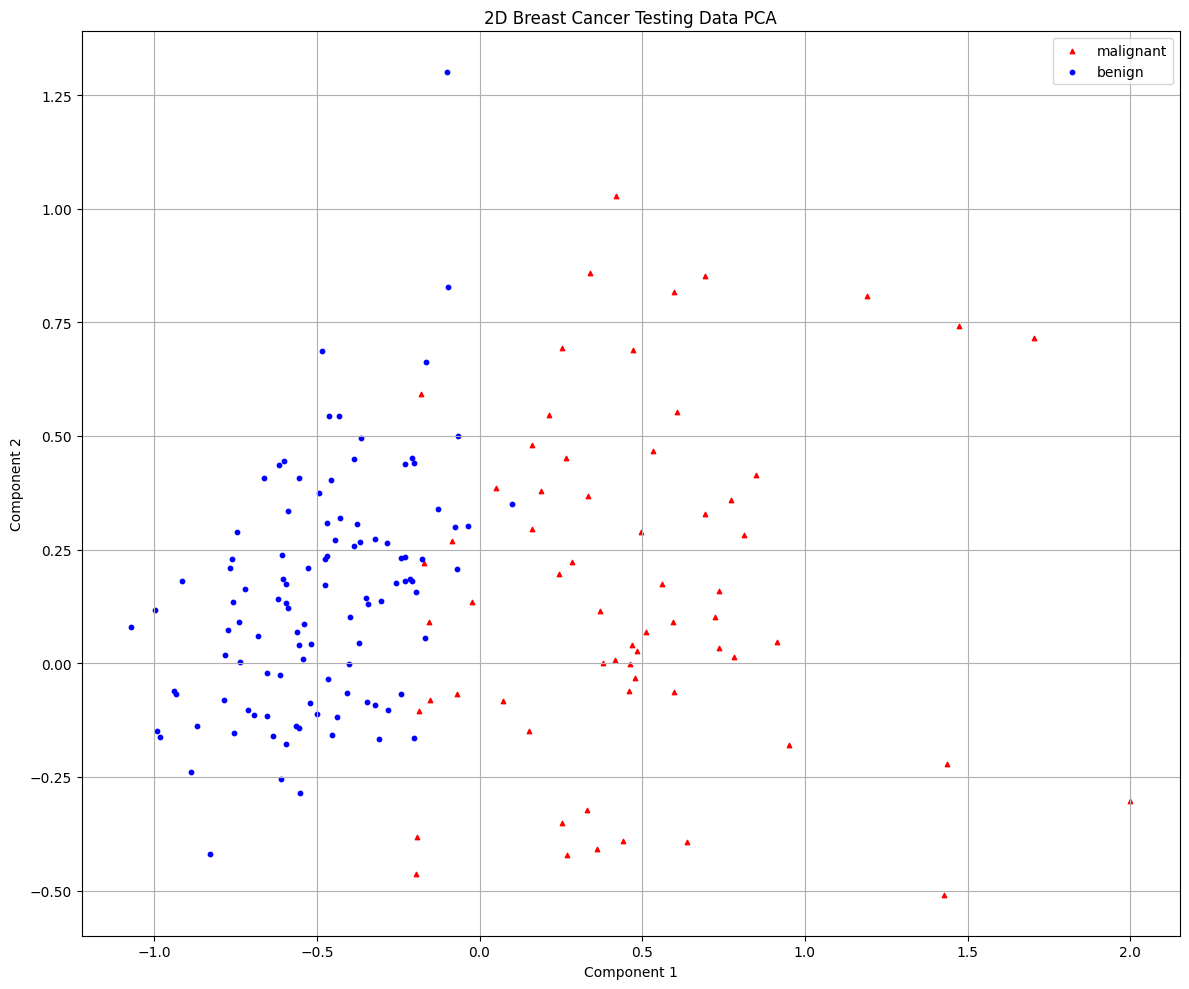

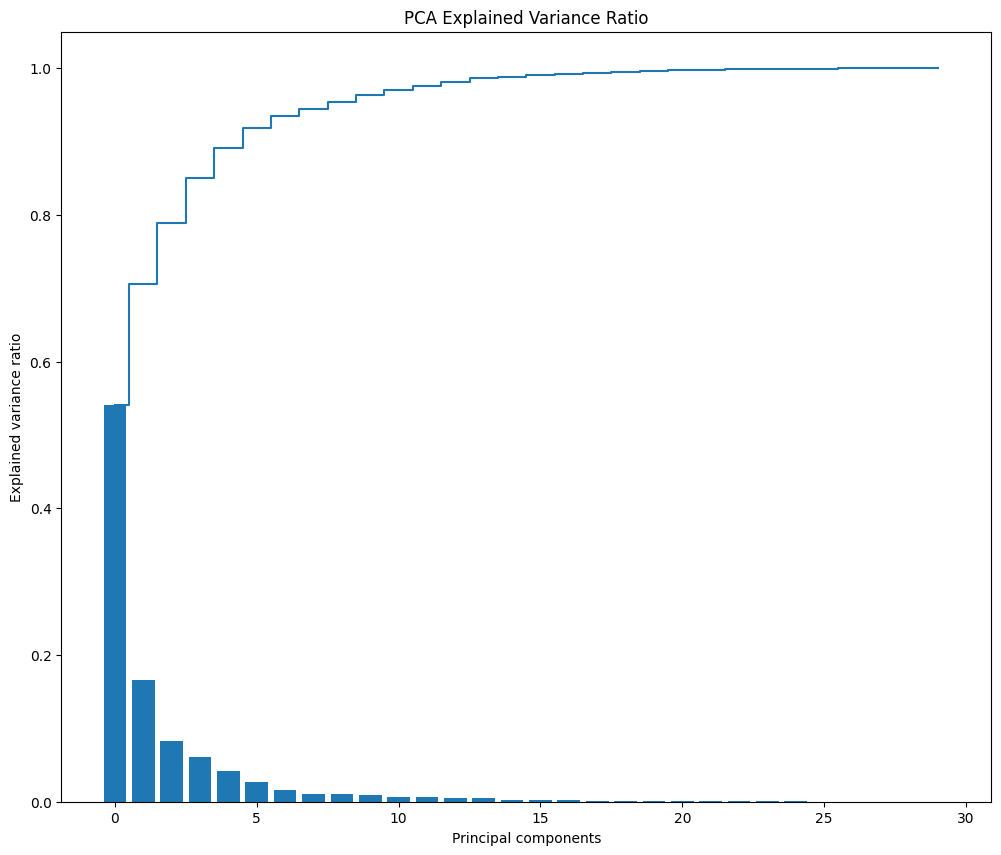

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})

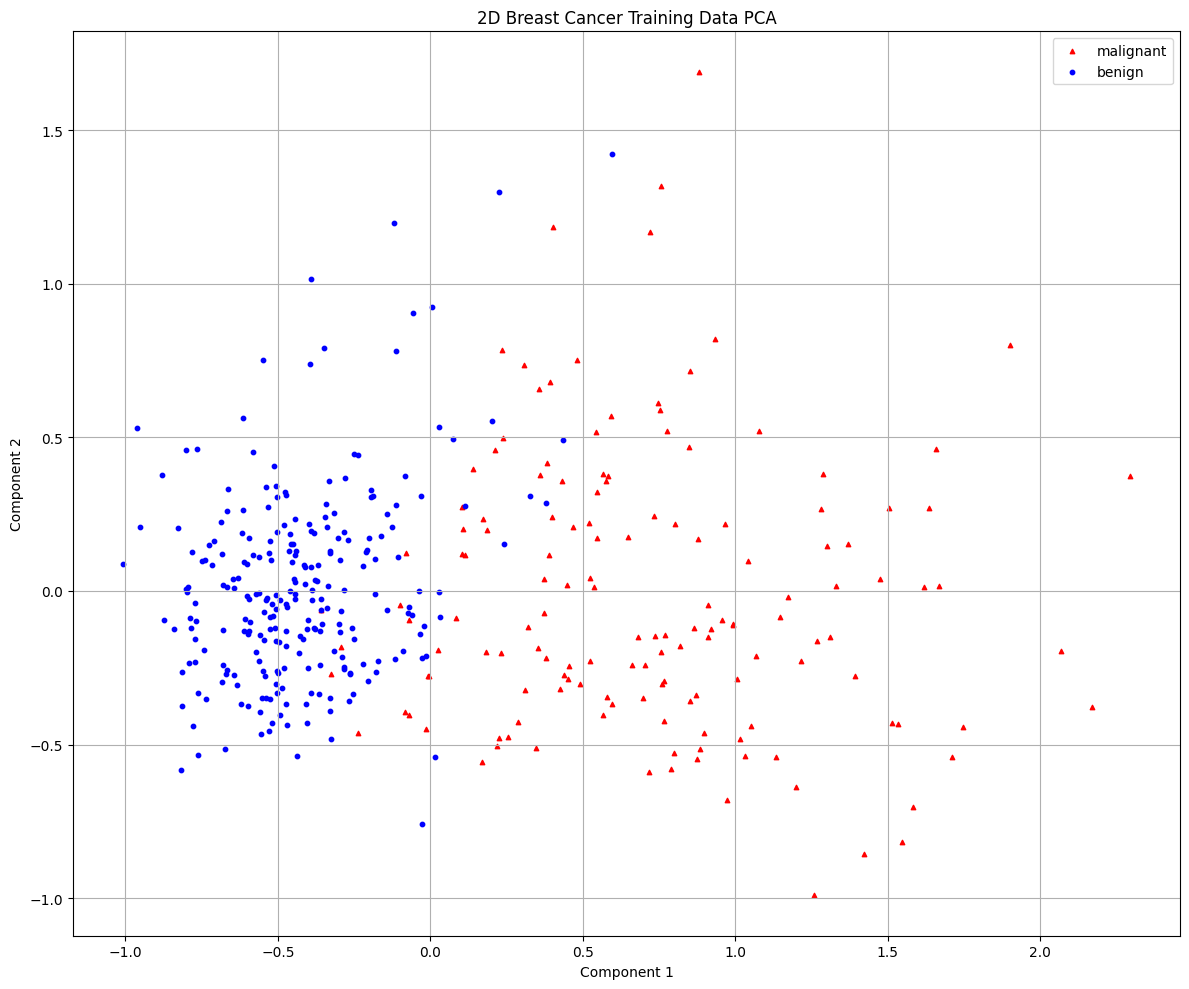

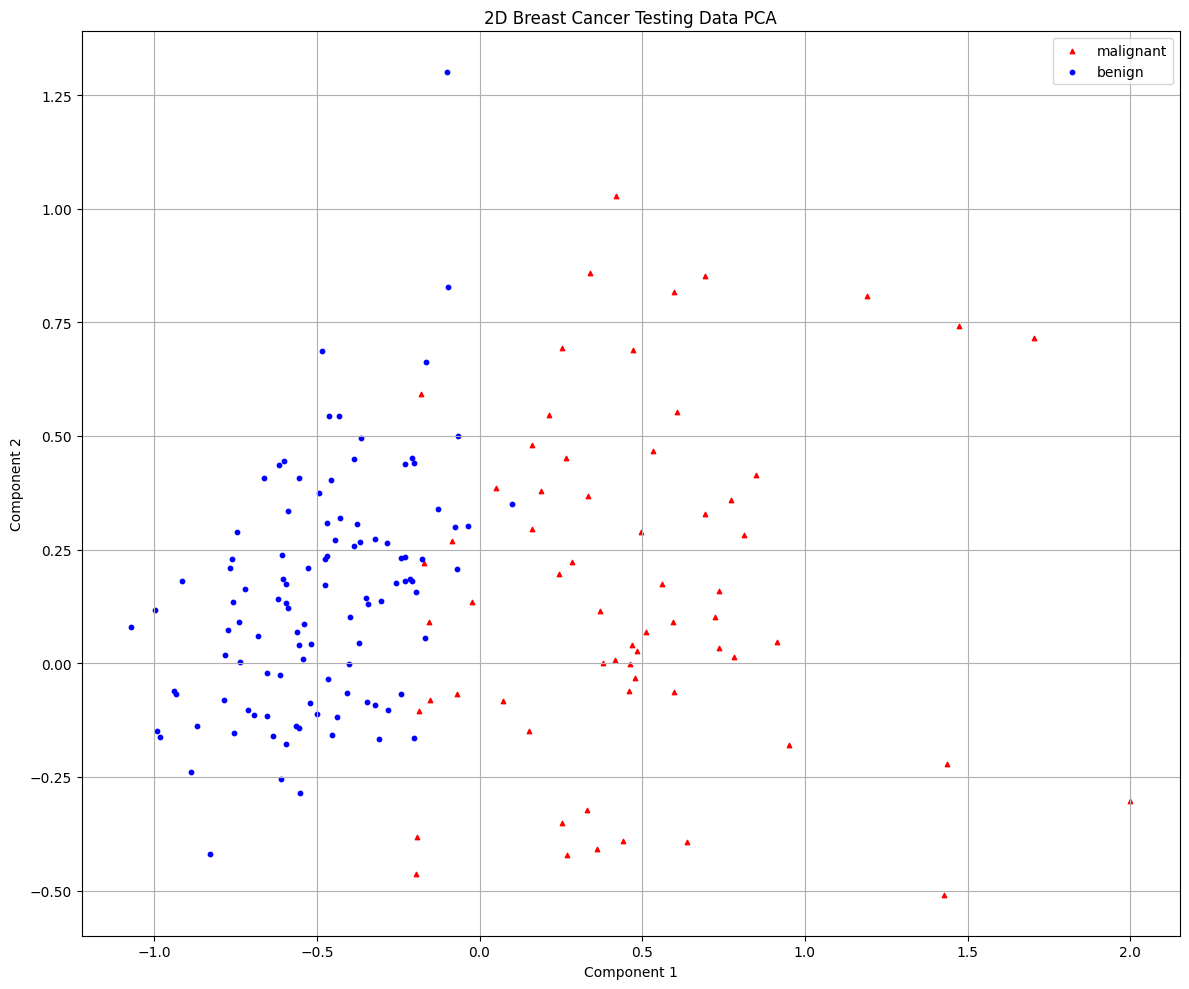

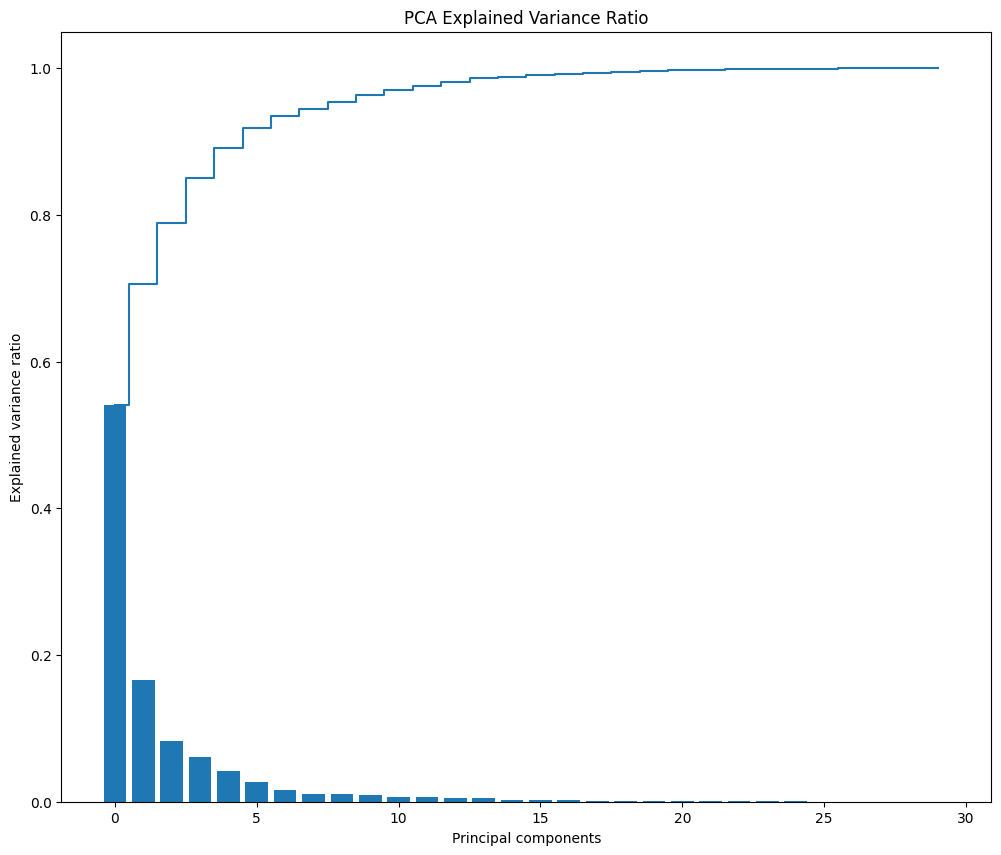

[I 2025-04-27 11:22:01,173] A new study created in memory with name: no-name-a37d6b58-f2a2-4e92-8b3d-27ff09b3f70a
[I 2025-04-27 11:22:01,202] Trial 0 finished with value: 0.8140506329113923 and parameters: {'C': 17.628651973668354, 'kernel': 'poly', 'gamma': 0.4652935647503945, 'degree': 5, 'max_iter': 8862}. Best is trial 0 with value: 0.8140506329113923.
[I 2025-04-27 11:22:01,219] Trial 1 finished with value: 0.9774050632911392 and parameters: {'C': 0.7564225231201952, 'kernel': 'linear', 'max_iter': 2099}. Best is trial 1 with value: 0.9774050632911392.
[I 2025-04-27 11:22:01,240] Trial 2 finished with value: 0.9572468354430379 and parameters: {'C': 8.48723748552598, 'kernel': 'sigmoid', 'gamma': 0.017041085571619926, 'max_iter': 7848}. Best is trial 1 with value: 0.9774050632911392.
[I 2025-04-27 11:22:01,284] Trial 3 finished with value: 0.6281645569620252 and parameters: {'C': 0.008735652957711823, 'kernel': 'sigmoid', 'gamma': 0.3150735547101187, 'max_iter': 6410}. Best is tria

Best trial:
Accuracy: 0.9824050632911392
Best hyperparameters:  {'C': 94.7270549922511, 'kernel': 'rbf', 'gamma': 0.004094480953233932, 'max_iter': 6152}


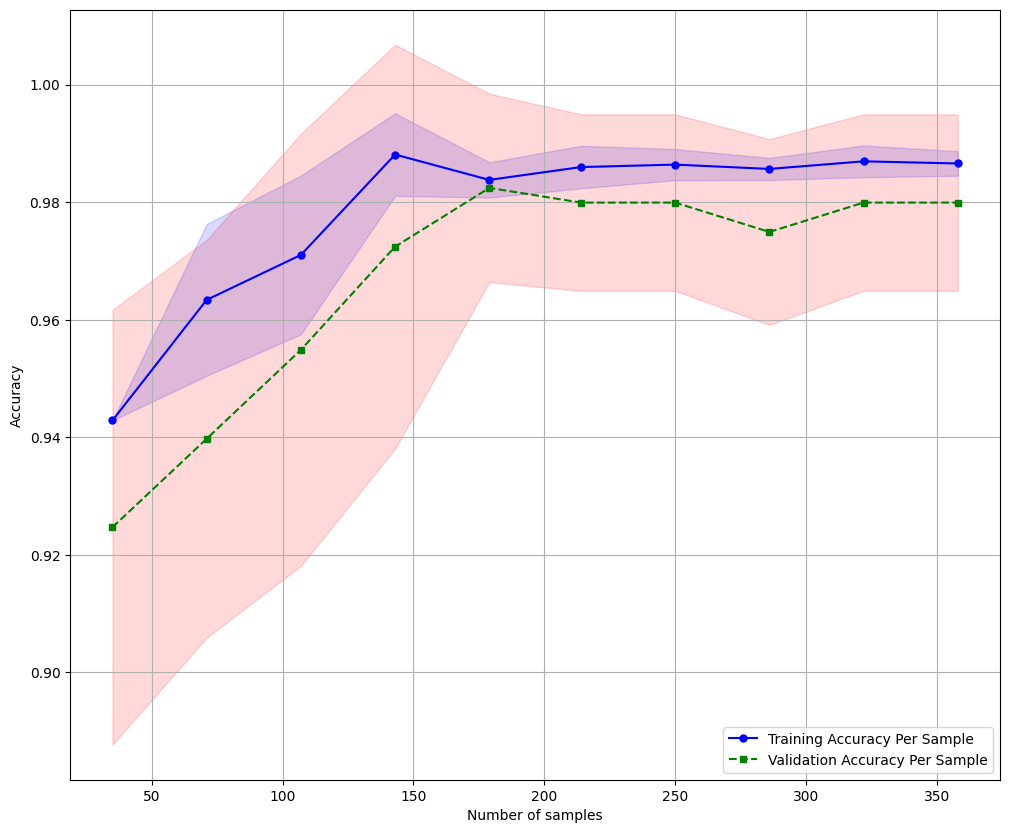

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC: 0.9926


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})
helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)